<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/TensorFlow_14_Deep_Learning_for_text_and_sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
replace jena_climate_2009_2016.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: jena_climate_2009_2016.csv  
  inflating: __MACOSX/._jena_climate_2009_2016.csv  


In [ ]:
import os 
data_dir = './'
fname = os.path.join(data_dir,'jena_climate_2009_2016.csv') 

In [ ]:
f = open(fname)
data = f.read()
f.close() 
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:] 

In [ ]:
print(header) 
print(len(lines))

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [ ]:
import numpy as np 
float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines): 
  values = [float(x) for x in line.split(',')[1:]]
  float_data[i, :] = values

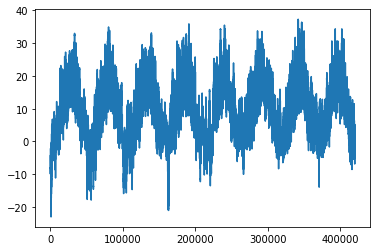

In [ ]:
from matplotlib import pyplot as plt 
temp = float_data[:, 1] 
plt.plot(range(len(temp)), temp)

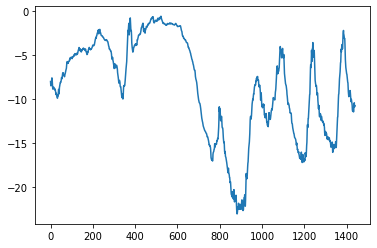

In [ ]:
plt.plot(range(1440), temp[:1440]) 

In [ ]:
mean = float_data[:200000].mean(axis=0)
float_data -= mean

In [ ]:
std = float_data[:20000].std(axis=0)

In [ ]:
float_data /= std

In [ ]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][1]
    yield samples, targets

In [ ]:
lookback = 1440 
step = 6 
delay = 144 
batch_size = 128 

In [ ]:
train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

val_steps = (300000 - 200001 - lookback)
test_steps = (len(float_data) - 300001 - lookback)

In [ ]:
def evaluate_naive_method():
  batch_maes = []
  for step in range(val_steps):
    print (step)
    samples, targets = next(val_gen)
    preds = samples[:, -1, 1]
    mae = np.mean(np.abs(preds - targets))
    batch_maes.append(mae)
  print(np.mean(batch_maes))
        
evaluate_naive_method()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
93560
93561
93562
93563
93564
93565
93566
93567
93568
93569
93570
93571
93572
93573
93574
93575
93576
93577
93578
93579
93580
93581
93582
93583
93584
93585
93586
93587
93588
93589
93590
93591
93592
93593
93594
93595
93596
93597
93598
93599
93600
93601
93602
93603
93604
93605
93606
93607
93608
93609
93610
93611
93612
93613
93614
93615
93616
93617
93618
93619
93620
93621
93622
93623
93624
93625
93626
93627
93628
93629
93630
93631
93632
93633
93634
93635
93636
93637
93638
93639
93640
93641
93642
93643
93644
93645
93646
93647
93648
93649
93650
93651
93652
93653
93654
93655
93656
93657
93658
93659
93660
93661
93662
93663
93664
93665
93666
93667
93668
93669
93670
93671
93672
93673
93674
93675
93676
93677
93678
93679
93680
93681
93682
93683
93684
93685
93686
93687
93688
93689
93690
93691
93692
93693
93694
93695
93696
93697
93698
93699
93700
93701
93702
93703
93704
93705
93706
93707
93708
93709
93710
93711
93712
93713
93714
93715
93716
93717
93718
93719
9372

In [ ]:
print (step)

6


In [ ]:
celsius_mae = 0.29 * std[1]